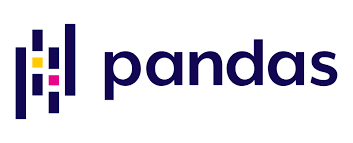

## [13] Konversi Nilai Numerik ke Dalam Sejumlah Kategori

### [13.1] Import Module

In [1]:
import pandas as pd
import numpy as np
#mencetak versi pandas dan numpy yang akan digunakan
print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [13.2] Persiapan Data Frame
- membentuk data frame yang terdiri dari 10 baris dan 1 kolom 
- isi dari data frame adalah angka random yang dimulai dari 1 - 99

In [2]:
n_rows = 10
n_cols = 1
cols = ('usia',)

df = pd.DataFrame(np.random.randint(1,99,size=(n_rows,n_cols)),columns=cols)
df

,usia
0,69
1,98
2,62
3,47
4,90
5,50
6,57
7,47
8,36
9,74


### [13.3] Pengelompokan Nilai Numerik ke Dalam Beberapa Kategori Menggunakan Cut ()
Mengelompokkan usia sesuai dengan jangkauan umur :
1. Anak dengan usia 0-18 tahun
2. Dewasa dengan usia 18-65 tahun
3. Manula dengan usia 65-99 tahun

In [3]:
df ['kelompok_usia'] =  pd.cut(df['usia'],
                              bins = [0,18,65,99],
                              labels = ['anak','dewasa','manula'])
df

,usia,kelompok_usia
0,69,manula
1,98,manula
2,62,dewasa
3,47,dewasa
4,90,manula
5,50,dewasa
6,57,dewasa
7,47,dewasa
8,36,dewasa
9,74,manula


## [14] Menggabungkan atau Merging Dua Pandas Data Frame

### [14.1] Import Module

In [4]:
import pandas as pd
import numpy as np
#mencetak versi pandas dan numpy yang akan digunakan
print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [14.2] Persiapan Data Frame
- Membentuk data frame dengan ukuran baris dan kolom 5 x 5 dengan isi data frame adalah integer random 1-20
- Untuk df1 merupakan salinan dari df akan tetapi baris 1 dan 4 dibuang
- Untuk df2 merupakan salinan dari df akan tetapi baris 0 dan 3 dibuang

In [5]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
df

,A,B,C,D,E
0,1,8,5,16,12
1,11,11,18,9,7
2,17,14,13,8,1
3,7,2,1,18,4
4,11,12,17,2,1


In [6]:
df1 = df.copy(deep=True)
df1 = df1.drop([1,4])
df1

,A,B,C,D,E
0,1,8,5,16,12
2,17,14,13,8,1
3,7,2,1,18,4


In [7]:
df2 = df.copy(deep=True)
df2 = df.drop([0,3])
df2

,A,B,C,D,E
1,11,11,18,9,7
2,17,14,13,8,1
4,11,12,17,2,1


### [14.3] Menggabungkan Dua Data Frame
#### Penggabungan dua data frame bisa dilakukan dengan banyak cara, akan tetapi pembahasan kali ini akan berfokus kepada teknik inner dan outer
- Penggabungan dengan teknik inner akan menghasilkan baris yang dimiliki oleh kedua data frame dan indeks setelah di-merge dengan teknik inner akan ter-reset kembali ke nol
- Penggabungan dengan teknik outer akan menggabungkan baris dari kedua data frame dan akan menghilangkan duplikasi diantara kedua data di dataframe

In [8]:
df_inner = pd.merge(df1,df2,how='inner')
df_inner

,A,B,C,D,E
0,17,14,13,8,1


In [9]:
df_outer = pd.merge(df1,df2,how='outer')
df_outer

,A,B,C,D,E
0,1,8,5,16,12
1,17,14,13,8,1
2,7,2,1,18,4
3,11,11,18,9,7
4,11,12,17,2,1


## [15] Memecah Nilai String dari Suatu Kolom ke Dalam Beberapa Kolom Baru

### [15.1] Import Module 

In [10]:
import pandas as pd
#mencetak versi pandas yang akan digunakan
print(pd.__version__)

1.0.5


### [15.2] Persiapan Data Frame 

In [18]:
data = {'nama':['Didi Kempot','Glenn Fredly','Mbah Surip'],
       'tempat_kelahiran':['Surakarta , Jawa Tengah','DKI Jakarta , Jakarta','Mojokerto , Jawa Timur']}
df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta , Jawa Tengah"
1,Glenn Fredly,"DKI Jakarta , Jakarta"
2,Mbah Surip,"Mojokerto , Jawa Timur"


### [15.3] Memecah Nama Depan dan Nama Belakang

In [19]:
df[['nama_depan','nama_belakang']] = df['nama'].str.split(' ',expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta , Jawa Tengah",Didi,Kempot
1,Glenn Fredly,"DKI Jakarta , Jakarta",Glenn,Fredly
2,Mbah Surip,"Mojokerto , Jawa Timur",Mbah,Surip


### [15.4] Memecah Nama Kota dan Provinsi

In [20]:
df[['kota','provinsi']] = df['tempat_kelahiran'].str.split(',',expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,provinsi
0,Didi Kempot,"Surakarta , Jawa Tengah",Didi,Kempot,Surakarta,Jawa Tengah
1,Glenn Fredly,"DKI Jakarta , Jakarta",Glenn,Fredly,DKI Jakarta,Jakarta
2,Mbah Surip,"Mojokerto , Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


## [16] Menata Ulang Data Frames dengan Multiple Indexes Menggunakan unstack()

### [16.1] Import Module

In [21]:
import pandas as pd
#mencetak versi pandas yang akan digunakan
print(pd.__version__)

1.0.5


### [16.2] Persiapan Data Frame
persiapan data frame titanicfull.csv

In [22]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### [16.3] Data Frame dengan Multiple Indexes dari Hasil Grouping
- pada data frame di bawah dapat dibaca pada pclass "1" dengan gender female angka rata-rata keselamatan adalah 0.965278
- to_frame() untuk memberikan bingkai pada dataframe agar data lebih mudah dibaca

In [23]:
df.groupby(['sex','pclass'])['survived'].mean().to_frame()

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

### [16.4] Menata ulang Data Frame dengan Multiple Index

In [24]:
df.groupby(['sex','pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130
